<h1>TITANIC SURVIVAL PREDICTION</h1>
<p>Done By,
Saisubramanian V
</p>
-------------------------------------------------------------------------------------------------------------------------------------------------
<h1>Introduction</h1>
<p><i>I am using the classic Titanic dataset. The data consists of demographic and traveling information for 418 of the Titanic passengers, and my goal is to predict the survival of the passengers.</i> </p>
<br>
<p><b>The key names used in the datasets are: </b></p>
<ul>
<li> Pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)</li>
<li>Survival: A Boolean indicating whether the passenger survived or not (0 = No; 1 = Yes); this is our target</li>
<li> Name: A field rich in information as it contains title and family names</li>
<li>Sex: male/female</li>
<li>Age: Age, asignificant portion of values aremissing</li>
<li> Sibsp: Number of siblings/spouses aboard</li>
<li> Parch: Number of parents/children aboard</li>
<li> Ticket: Ticket number.</li>
<li> Fare: Passenger fare (British Pound).</li>
<li>Cabin: Doesthe location of the cabin influence chances of survival?</li>
<li>Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)</li>
 </ul>
 <h1>Objective:</h1>
 <p>To build best model that can predict survived passenger.</p>
<h1>Importing Modules</h1>

In [309]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


<h1>Reading Data Set</h1>

In [310]:
df= pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<h1>Exploratory Data Analysis(EDA)</h1>

In [311]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [312]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [313]:
df.shape

(418, 12)

In [314]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [315]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [316]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [317]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [318]:
Embarked = df['Embarked'].unique()
for Embarkeds in Embarked:
    print("->",Embarkeds)

-> Q
-> S
-> C


In [319]:
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [320]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

In [321]:
df['Age'] = df['Age'].astype(int)

In [322]:
df['Fare'] = df['Fare'].astype(int)

In [323]:
data = df.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)

In [324]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


<h1>Data Visualization</h1>

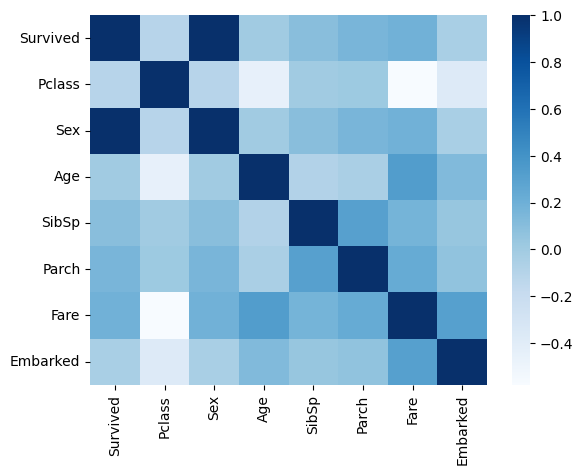

In [325]:
corrmat = df.corr()
fig = plt.figure()
sns.heatmap(corrmat,cmap='Blues')
plt.show()

In [326]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x: 'float | ArrayLike', height: 'float | ArrayLike', width: 'float | ArrayLike' = 0.8, bottom: 'float | ArrayLike | None' = None, *, align: "Literal['center', 'edge']" = 'center', data=None, **kwargs) -> 'BarContainer'
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
        Note that if *bottom* has units (e.g. datetime), *height* should be in
        units that are a difference from the value of *bottom* (e.g. ti

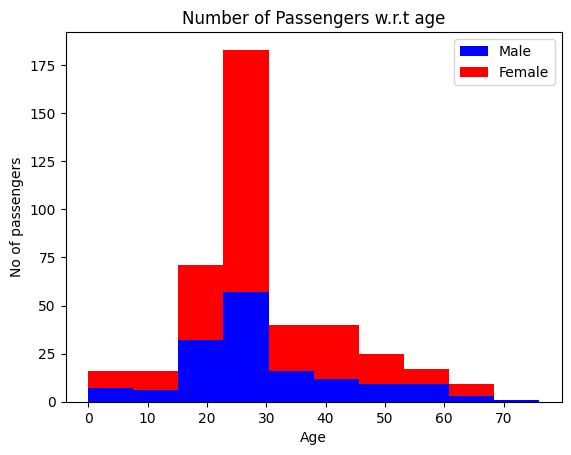

In [327]:
fig = plt.figure()
plt.hist(x = [df[df['Sex']==1]['Age'], df[df['Sex']==0]['Age']],stacked=True, color = ['b','r'],label = ['Male','Female'])
plt.title('Number of Passengers w.r.t age')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

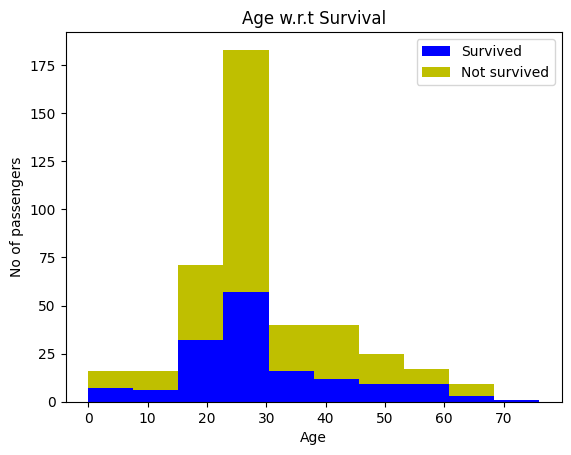

In [328]:
fig = plt.figure()
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['b','y'],label = ['Survived','Not survived'])
plt.title('Age w.r.t Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

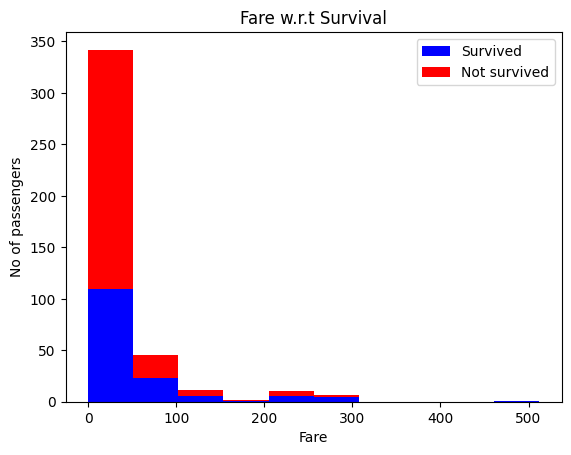

In [329]:
fig = plt.figure()
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, color = ['b','r'],label = ['Survived','Not survived'])
plt.title('Fare w.r.t Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

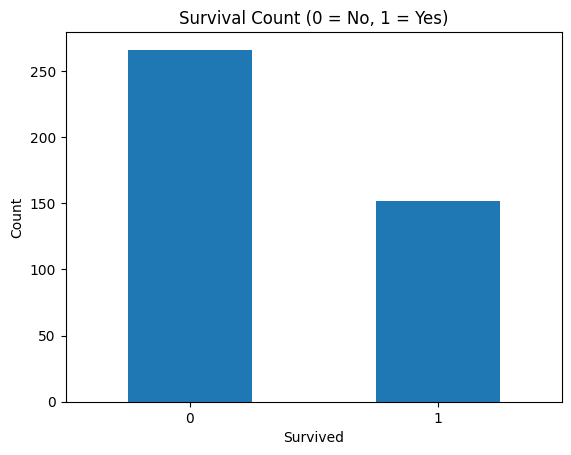

In [330]:
column = 'Survived'

# Create a bar chart
survival_counts = df[column].value_counts()
survival_counts.plot(kind='bar', rot=0)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')

# Show the plot
plt.show()

<h1>Spliting the data</h1>


In [331]:
Train = df.drop(['Survived'], axis=1)
Test = df.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

<h1>Model Building</h1>


In [332]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))
print(classification_report(y_pred,y_test))

Logistic regression accuracy: 92.86%
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        17
           2       0.74      1.00      0.85        17
           3       1.00      0.90      0.95        50

    accuracy                           0.93        84
   macro avg       0.91      0.95      0.92        84
weighted avg       0.95      0.93      0.93        84



In [333]:
target = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(df,target, test_size = 0.2)

In [334]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

### Testing

In [335]:
y_pred = rf.predict(x_train)

In [336]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

1.0

In [337]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

n_estimators = [1, 2, 4, 5, 6, 7, 45, 100]
training_results = []
testing_results = []

for val in n_estimators:
    #training
    # Train the Random Forest classifier with 'val' number of estimators
    rf = RandomForestClassifier(n_estimators=val, n_jobs=1)
    rf.fit(x_train, y_train)
    
    # Predict on the training data
    pred_train = rf.predict(x_train)
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_train)
    
    # Calculate the AUC for training data
    roc_auc_train = auc(fpr_train, tpr_train)
    
    # Append the AUC for training data to the list
    training_results.append(roc_auc_train)
    
    #testing
    # Predict on the testing data
    pred_test = rf.predict(x_test)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_test)
    
    # Calculate the AUC for testing data
    roc_auc_test = auc(fpr_test, tpr_test)
    
    # Append the AUC for testing data to the list
    testing_results.append(roc_auc_test)

In [338]:
print(f'\n Testing Results are:{testing_results}')
print(f'\n Training Results are: {training_results}')


 Testing Results are:[1.0, 0.935483870967742, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

 Training Results are: [1.0, 0.9876033057851239, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


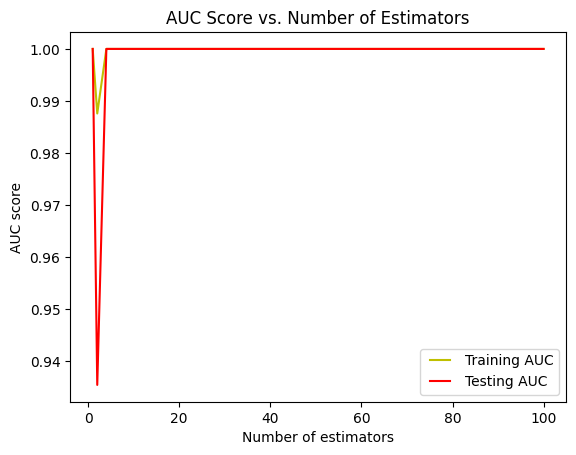

In [339]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

# Plotting
line1, = plt.plot(n_estimators, training_results, 'y', label="Training AUC")
line2, = plt.plot(n_estimators, testing_results, 'r', label="Testing AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2), line2: HandlerLine2D(numpoints=2)})
plt.xlabel('Number of estimators')
plt.ylabel('AUC score')
plt.title('AUC Score vs. Number of Estimators')
plt.show()

In [340]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       121

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

